# Wrangle Austin Traffic Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('reports.csv')

In [3]:
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000


In [4]:
df.dtypes

Traffic Report ID     object
Published Date        object
Issue Reported        object
Location              object
Latitude             float64
Longitude            float64
Address               object
Status                object
Status Date           object
dtype: object

In [13]:
df.shape

(286460, 8)

#### Drop Unuseful Column

In [5]:
df.drop(columns = 'Traffic Report ID', inplace = True)

In [6]:
df.head()

,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000
1,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000
2,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000
3,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000
4,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000


#### Changing Date Datatype

In [7]:
df['Published Date'] = pd.to_datetime(df['Published Date'], infer_datetime_format=True)

In [8]:
df = df.set_index(df['Published Date'])

In [28]:
df.dtypes

Published Date    datetime64[ns, UTC]
Issue Reported                 object
Location                       object
Latitude                      float64
Longitude                     float64
Address                        object
Status                         object
Status Date                    object
dtype: object

#### Check NaN

In [8]:
df.isnull().sum()

Published Date       0
Issue Reported       0
Location           646
Latitude            79
Longitude           79
Address              0
Status            1693
Status Date          0
dtype: int64

#### Replace Location Nulls

In [8]:
# Replace nulls with latitude and longitude
df.Location.fillna("("+str(df.Latitude)+","+str(df.Longitude)+")", inplace = True)

In [9]:
# Check nulls
df.isnull().sum()

Published Date       0
Issue Reported       0
Location             0
Latitude            79
Longitude           79
Address              0
Status            1693
Status Date          0
dtype: int64

In [10]:
# Drop the null values in latitude and longitude
df = df.dropna(subset = ['Latitude', 'Longitude'])

In [11]:
# Check nulls again
df.isnull().sum()

Published Date       0
Issue Reported       0
Location             0
Latitude             0
Longitude            0
Address              0
Status            1691
Status Date          0
dtype: int64

In [12]:
df.to_csv("cleaned_report.csv")

# EDA (Exploratory Data Analysis)

## Date

In [13]:
# Look at the date range of this dataset
df['Published Date'].min()

Timestamp('2017-09-26 04:11:00+0000', tz='UTC')

In [14]:
df['Published Date'].max()

Timestamp('2022-08-27 12:58:56+0000', tz='UTC')

#### Date in this dataset range from 2017-09-26 to 2022-08-27

### Incidents per Year

In [32]:
count_per_year = df['Issue Reported'].resample('Y').count()

In [33]:
count_per_year

Published Date
2017-12-31 00:00:00+00:00    17139
2018-12-31 00:00:00+00:00    70047
2019-12-31 00:00:00+00:00    68051
2020-12-31 00:00:00+00:00    45320
2021-12-31 00:00:00+00:00    51338
2022-12-31 00:00:00+00:00    34565
Freq: A-DEC, Name: Issue Reported, dtype: int64

## Issue Reported

In [17]:
df['Issue Reported'].value_counts()

Traffic Hazard                88355
Crash Urgent                  67919
Crash Service                 41509
COLLISION                     26239
TRFC HAZD/ DEBRIS             20542
zSTALLED VEHICLE               8925
LOOSE LIVESTOCK                7328
COLLISION WITH INJURY          6960
Traffic Impediment             6252
COLLISN/ LVNG SCN              4981
Stalled Vehicle                4278
COLLISION/PRIVATE PROPERTY     1160
VEHICLE FIRE                   1000
BLOCKED DRIV/ HWY               612
BOAT ACCIDENT                   118
AUTO/ PED                        80
TRAFFIC FATALITY                 77
ICY ROADWAY                      64
FLEET ACC/ INJURY                38
N / HZRD TRFC VIOL                9
OBSTRUCT HWY                      8
FLEET ACC/ FATAL                  3
HIGH WATER                        2
COLLISN / FTSRA                   1
Name: Issue Reported, dtype: int64

In [18]:
# Put the top 10 issue and counts into a new dataframe
issues = pd.DataFrame(df['Issue Reported'].value_counts().head(10))
issues

,Issue Reported
Traffic Hazard,88355
Crash Urgent,67919
Crash Service,41509
COLLISION,26239
TRFC HAZD/ DEBRIS,20542
zSTALLED VEHICLE,8925
LOOSE LIVESTOCK,7328
COLLISION WITH INJURY,6960
Traffic Impediment,6252
COLLISN/ LVNG SCN,4981


<AxesSubplot:title={'center':'Top 10 Issue Reported 2017-2022'}, xlabel='Type of Issue', ylabel='Issue Reported'>

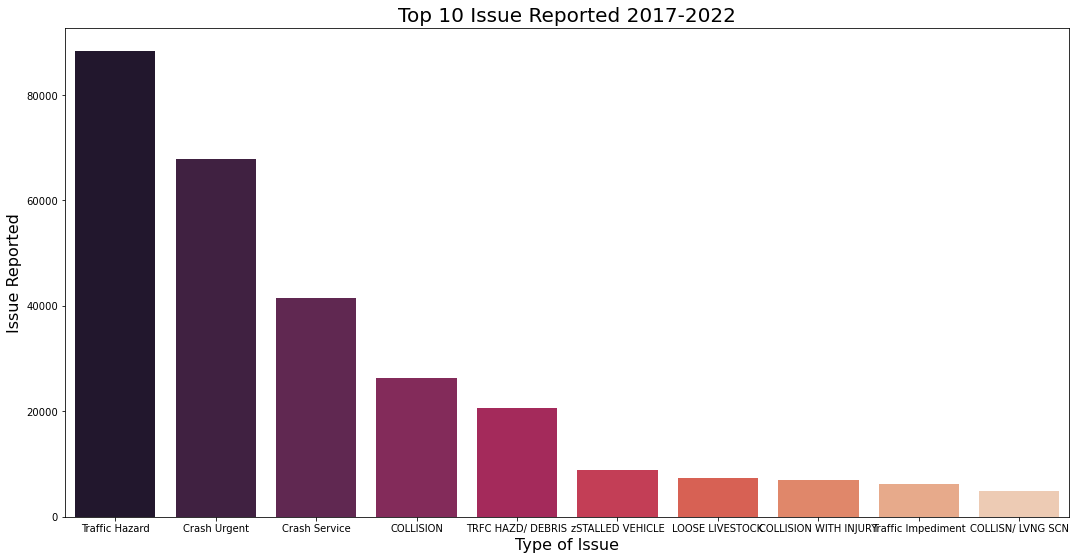

In [25]:
plt.figure(figsize = (18,9))
plt.xlabel('Type of Issue', fontsize = 16)
plt.ylabel('No. of Issue', fontsize = 16)
plt.title('Top 10 Issue Reported 2017-2022', fontsize = 20)
sns.barplot(x=issues.index,y=issues['Issue Reported'], palette = 'rocket')